In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import re
from bs4 import BeautifulSoup
import requests   
import selenium
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from IPython.display import Image, display  
import pydotplus 
from scipy import misc
from matplotlib.colors import ListedColormap
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("pend-gdis-1960-2018-disasterlocations.csv")
df

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39948,Jun-94,Dominica,NaN,NaN,2015,45253,Saint Patrick,1,Saint Patrick,NaN,NaN,St. Patrick province,1,NaN,storm,2015-0375,15.282063,-61.291589
39949,Jun-94,Dominica,NaN,NaN,2015,45254,Saint Andrew,1,Saint Andrew,NaN,NaN,St. Andrew province,1,NaN,storm,2015-0375,15.541065,-61.350601
39950,Jun-94,Dominica,NaN,NaN,2015,45255,Saint George,1,Saint George,NaN,NaN,St. George province,1,NaN,storm,2015-0375,15.308003,-61.343527
39951,Jun-94,Dominica,NaN,NaN,2015,45256,Saint David,1,Saint David,NaN,NaN,St. David province,1,NaN,storm,2015-0375,15.413059,-61.282094


In [3]:
url = "https://statisticstimes.com/geography/countries-by-continents.php"
html = requests.get(url)
soup = BeautifulSoup(html.content,"html.parser")

In [4]:
def list_of_continent(soup):
    countries = []
    continents = []
    tbl = soup("tbody")[1]
    for row in tbl("tr"):
        cell = row("td")
        if(len(cell)<6):
            continue
        countries.append(cell[1].get_text())
        continents.append(cell[6].get_text())
    df = pd.DataFrame({"country": countries , "continent" : continents})
    return df


In [5]:
df_continent = list_of_continent(soup)

df_continent

,country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna Islands,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [6]:
asia_1 = df_continent[df_continent["continent"]=="Asia"]
asia_c = asia_1["country"].values
europe_1 = df_continent[df_continent["continent"] == "Europe"]
europe_c = europe_1["country"].values
africa_1 = df_continent[df_continent["continent"] == "Africa"]
africa_c = africa_1["country"].values
oceania_1 = df_continent[df_continent["continent"] == "Oceania"]
oceania_c = oceania_1["country"].values
n_america = df_continent[df_continent["continent"] == "North America"]
north_america_c = n_america["country"].values
s_america = df_continent[df_continent["continent"] == "South America"]
south_america_c = s_america["country"].values
continents = [asia_c,europe_c,africa_c,oceania_c,north_america_c,south_america_c]

cleaning the data from non relevante

In [11]:
def get_big_data(df):
    df1 = df.copy()
    df2 = df1.copy()
    df2.isnull().sum()
    df2.dropna()
    df2[df2.duplicated()]
    df2.drop_duplicates()
    df2.drop(["id","iso3","geo_id","adm1","adm2","adm3","hist_country","disasterno"],axis=1,inplace= True)
    df3 = df2[df2["year"]>= 2014]
    return df3.dropna()

In [35]:
big_data = get_big_data(df)
big_data

,country,gwno,year,geolocation,level,location,historical,disastertype,latitude,longitude
64,Bosnia And Herzegovina,346.0,2014,Domaljevac-Samac,3,Somaljevac,0,flood,45.069584,18.539875
65,Bosnia And Herzegovina,346.0,2014,Zenica,3,Zenica,0,flood,44.273467,17.910543
111,France,220.0,2014,Perpignan,3,Perpignan region,0,flood,42.733064,2.772827
255,Madagascar,580.0,2015,Ambalavao,3,Ambalavao,0,storm,-21.877102,46.718606
256,Madagascar,580.0,2015,Ambohidratrimo,3,Ambohidratimo,0,storm,-18.658502,47.445230
...,...,...,...,...,...,...,...,...,...,...
39896,Guatemala,90.0,2018,Quetzaltenango,2,Quetzaltenango,0,flood,14.808369,-91.533492
39897,Guatemala,90.0,2018,Peten,1,Peten,0,flood,16.973567,-90.015030
39898,Guatemala,90.0,2018,Sacatepequez,1,Sacatepequez,0,flood,14.552770,-90.741482
39899,Guatemala,90.0,2018,San Marcos,1,San Marcos,0,flood,15.019354,-91.932322


In [36]:
def get_big_data_for_continent(df,countries):
    l1=[]
    l2=[]
    l3=[]
    l4=[]
    l5=[]
    l6=[]
    l7=[]
    l8=[]
    l9=[]
    l10=[]
    for i in df.values:
        flag = 0
        for j in countries:
            if i[0] == j.split(" (")[0]:
                flag = 1
        if flag == 1:
            l1.append(i[0].strip())
            l2.append(i[1])
            l3.append(i[2])
            l4.append(i[3].strip())
            l5.append(i[4])
            l6.append(i[5])
            l7.append(i[6])
            l8.append(i[7])
            l9.append(i[8])
            l10.append(i[9])

    df2 = pd.DataFrame({"country":l1,"gwno":l2,"year":l3,"geolocation":l4,
                        "level":l5,"location":l6,"historical":l7,'disasterType':l8,
                        "latitude":l9,"longitude":l10})
    return df2

In [37]:

asia=get_big_data_for_continent(big_data , continents[0])
europe = get_big_data_for_continent(big_data , continents[1])
africa = get_big_data_for_continent(big_data , continents[2])
oceania = get_big_data_for_continent(big_data , continents[3])
north_america = get_big_data_for_continent(big_data , continents[4])
south_america = get_big_data_for_continent(big_data , continents[5])
big_data

,country,gwno,year,geolocation,level,location,historical,disastertype,latitude,longitude
64,Bosnia And Herzegovina,346.0,2014,Domaljevac-Samac,3,Somaljevac,0,flood,45.069584,18.539875
65,Bosnia And Herzegovina,346.0,2014,Zenica,3,Zenica,0,flood,44.273467,17.910543
111,France,220.0,2014,Perpignan,3,Perpignan region,0,flood,42.733064,2.772827
255,Madagascar,580.0,2015,Ambalavao,3,Ambalavao,0,storm,-21.877102,46.718606
256,Madagascar,580.0,2015,Ambohidratrimo,3,Ambohidratimo,0,storm,-18.658502,47.445230
...,...,...,...,...,...,...,...,...,...,...
39896,Guatemala,90.0,2018,Quetzaltenango,2,Quetzaltenango,0,flood,14.808369,-91.533492
39897,Guatemala,90.0,2018,Peten,1,Peten,0,flood,16.973567,-90.015030
39898,Guatemala,90.0,2018,Sacatepequez,1,Sacatepequez,0,flood,14.552770,-90.741482
39899,Guatemala,90.0,2018,San Marcos,1,San Marcos,0,flood,15.019354,-91.932322


In [38]:
asia["continent"] = "Asia"
asia["location_id"] = LabelEncoder().fit_transform(asia["location"])

europe["continent"] = "Europe"
europe["location_id"] = LabelEncoder().fit_transform(europe["location"])

africa["continent"] = "Africa"
africa["location_id"] = LabelEncoder().fit_transform(africa["location"])

oceania["continent"] = "Oceania"
oceania["location_id"] = LabelEncoder().fit_transform(oceania["location"])

north_america["continent"] = "North America"
north_america["location_id"] = LabelEncoder().fit_transform(north_america["location"])

south_america["continent"] = "South America"
south_america["location_id"] = LabelEncoder().fit_transform(south_america["location"])

big_data = pd.concat([asia,europe,africa,oceania,north_america,south_america])
big_data = big_data.drop(['geolocation','level','historical'],axis="columns")
big_data["continent_id"] = LabelEncoder().fit_transform(big_data["continent"])


Text(0.5, 1.0, 'Number of Floods by Continent')

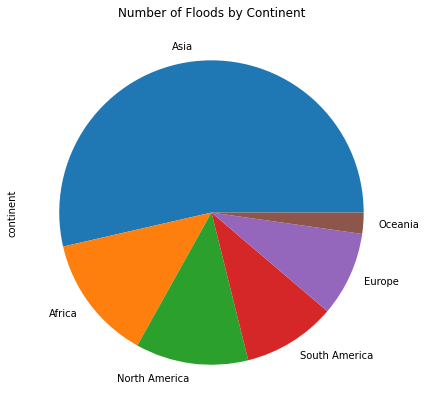

In [39]:
fig2=plt.figure(figsize=(7,7))
big_data["continent"].value_counts().plot(kind='pie')
plt.title('Number of Floods by Continent')

In [40]:

asia_clean=asia.copy()
asia_clean.drop(['gwno','geolocation','level','historical','latitude','longitude','continent','location_id'],axis=1,inplace= True)

asia_clean

,country,year,location,disasterType
0,Nepal,2014,Lalitpur,flood
1,Nepal,2014,Sindhupalchok,flood
2,Nepal,2014,Banke,flood
3,Nepal,2014,Bardyia,flood
4,Nepal,2014,Dang,flood
...,...,...,...,...
3480,China,2018,Jiangxi,storm
3481,China,2018,Zhejiang,storm
3482,China,2018,Guizhou,storm
3483,China,2018,Hunan,storm


In [ ]:
asia_clean.sort_values("year")


## getting the speciffic date

In [46]:
#WWWWWWORKINGGGG

PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
url = "https://floodlist.com/"
asia_date=list()
for i in range(len(asia_clean)):
    driver.get(url)
    
    search=driver.find_element_by_class_name("n-search")#search bar
    search.send_keys(str(asia_clean["year"][i]))
    search.send_keys(Keys.SPACE) 
    search.send_keys(asia_clean["location"][i])
    search.send_keys(Keys.RETURN)
    print(i)
    soupy_main=None
    try:
        main=WebDriverWait(driver,1).until(
        EC.presence_of_element_located((By.CLASS_NAME,"site-main"))     
        )
        #this 2 row gets the date of the article
        soupy_main=BeautifulSoup(main.get_attribute('innerHTML'),"html.parser")
        if(soupy_main.find("time")!=None):
            date=soupy_main.find("time").text#getting the span tag
        else:
            date=None
        asia_date.append(date)    
    except Exception as e:
        print(e)
    time.sleep(1)
    
    #print("NUMBER:",i,"is",asia_date)
        
asia_clean['Date']=asia_date

print(asia_clean)

C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/3660825095.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/3660825095.py:10: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  search=driver.find_element_by_class_name("n-search")#search bar


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Message: 
Stacktrace:
Backtrace:
	Ordinal0 [0x00CE6463+2188387]
	Ordinal0 [0x00C7E461+1762401]
	Ordinal0 [0x00B93D78+802168]
	Ordinal0 [0x00BC1880+989312]
	Ordinal0 [0x00BC1B1B+989979]
	Ordinal0 [0x00BEE912+1173778]
	Ordinal0 [0x00BDC824+1099812]
	Ordinal0 [0x00BECC22+1166370]
	Ordinal0 [0x00BDC5F6+1099254]
	Ordinal0 [0x00BB6BE0+945120]
	Ordinal0 [0x00BB7AD6+948950]
	GetHandleVerifier [0x00F871F2+2712546]
	GetHandleVerifier [0x00F7886D+2652765]
	GetHandleVerifier [0x00D7002A+520730]
	GetHandleVerifier [0x00D6EE06+516086]
	Ordinal0 [0x00C8468B+1787531]
	Ordinal0 [0x00C88E88+1805960]
	Ordinal0 [0x00C88F75+1806197]
	Ordinal0 [0x00C91DF1+1842673]
	BaseThreadInitThunk [0x76F56739+25]
	RtlGetFullPathName_UEx [0x77EB8FEF+1215]
	RtlGetFullPathName_UEx [0x77EB8FBD+1165]

31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


TimeoutException: Message: timeout: Timed out receiving message from renderer: 300.000
  (Session info: chrome=103.0.5060.53)
Stacktrace:
Backtrace:
	Ordinal0 [0x00CE6463+2188387]
	Ordinal0 [0x00C7E461+1762401]
	Ordinal0 [0x00B93D78+802168]
	Ordinal0 [0x00B85E3A+745018]
	Ordinal0 [0x00B84C28+740392]
	Ordinal0 [0x00B85228+741928]
	Ordinal0 [0x00B8EF2F+782127]
	Ordinal0 [0x00B99FBB+827323]
	Ordinal0 [0x00B9D310+840464]
	Ordinal0 [0x00B854F6+742646]
	Ordinal0 [0x00B99E05+826885]
	Ordinal0 [0x00BECF6D+1167213]
	Ordinal0 [0x00BDC5F6+1099254]
	Ordinal0 [0x00BB6BE0+945120]
	Ordinal0 [0x00BB7AD6+948950]
	GetHandleVerifier [0x00F871F2+2712546]
	GetHandleVerifier [0x00F7886D+2652765]
	GetHandleVerifier [0x00D7002A+520730]
	GetHandleVerifier [0x00D6EE06+516086]
	Ordinal0 [0x00C8468B+1787531]
	Ordinal0 [0x00C88E88+1805960]
	Ordinal0 [0x00C88F75+1806197]
	Ordinal0 [0x00C91DF1+1842673]
	BaseThreadInitThunk [0x76F56739+25]
	RtlGetFullPathName_UEx [0x77EB8FEF+1215]
	RtlGetFullPathName_UEx [0x77EB8FBD+1165]


In [61]:
PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
url = "https://floodlist.com/"
for i in range(3280,len(asia_clean)):
    driver.get(url)
    
    search=driver.find_element_by_class_name("n-search")#search bar
    search.send_keys(str(asia_clean["year"][i]))
    search.send_keys(Keys.SPACE) 
    search.send_keys(asia_clean["location"][i])
    search.send_keys(Keys.RETURN)
    print(i)
    soupy_main=None
    try:
        main=WebDriverWait(driver,1).until(
        EC.presence_of_element_located((By.CLASS_NAME,"site-main"))     
        )
        #this 2 row gets the date of the article
        soupy_main=BeautifulSoup(main.get_attribute('innerHTML'),"html.parser")
        if(soupy_main.find("time")!=None):
            date=soupy_main.find("time").text#getting the span tag
        else:
            date=None
        asia_date.append(date)    
    except Exception as e:
        print(e)
    time.sleep(1)
    
    #print("NUMBER:",i,"is",asia_date)
        
asia_clean['Date']=asia_date

print(asia_clean)

C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/2900599226.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/2900599226.py:7: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  search=driver.find_element_by_class_name("n-search")#search bar


3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3326
3327
3328
3329
3330
3331
3332
3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479


ValueError: Length of values (2877) does not match length of index (3485)

In [72]:
asia_clean = asia_clean.head(2877)
asia_clean['Date']=asia_date

asia_clean

C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/721361333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_clean['Date']=asia_date


,country,year,location,disasterType,Day,Month,Date
0,Nepal,2014,Lalitpur,flood,14,July,"14 July, 2014"
1,Nepal,2014,Sindhupalchok,flood,19,October,"19 October, 2014"
2,Nepal,2014,Banke,flood,3,July,"3 July, 2018"
3,Nepal,2014,Bardyia,flood,None,None,None
4,Nepal,2014,Dang,flood,2,November,"2 November, 2017"
...,...,...,...,...,...,...,...
2872,Japan,2014,Saitama,extreme temperature,8,June,"8 June, 2018"
2873,Japan,2014,Nagasaki,extreme temperature,13,August,"13 August, 2018"
2874,Japan,2014,Sizuoka,extreme temperature,None,None,None
2875,Japan,2014,Totigi,extreme temperature,8,June,"8 June, 2018"


In [73]:
#Splitting the date from date column

city_list=list()
day_list=list()
month_list=list()
st_one="1"
flag=0
dAte_l=list()
year_l=list()

for i in asia_clean["Date"]:
    if i==None:
        day_list.append(i)
        month_list.append(i)
        year_l.append(i)
        
        continue
        
    else:
        
        full_date=i.split(',')[0].split(" ")#brings back list
        month = full_date[1]
        day = full_date[0]  
        month_list.append(month)
        day_list.append(day)

    
asia_clean['Day']=day_list    
asia_clean['Month']=month_list


    
print('==============')
asia_clean

C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/3643390885.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_clean['Day']=day_list
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/3643390885.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_clean['Month']=month_list


,country,year,location,disasterType,Day,Month,Date
0,Nepal,2014,Lalitpur,flood,14,July,"14 July, 2014"
1,Nepal,2014,Sindhupalchok,flood,19,October,"19 October, 2014"
2,Nepal,2014,Banke,flood,3,July,"3 July, 2018"
3,Nepal,2014,Bardyia,flood,None,None,None
4,Nepal,2014,Dang,flood,2,November,"2 November, 2017"
...,...,...,...,...,...,...,...
2872,Japan,2014,Saitama,extreme temperature,8,June,"8 June, 2018"
2873,Japan,2014,Nagasaki,extreme temperature,13,August,"13 August, 2018"
2874,Japan,2014,Sizuoka,extreme temperature,None,None,None
2875,Japan,2014,Totigi,extreme temperature,8,June,"8 June, 2018"


In [96]:
clean_country=list()
clean_year = list()
clean_city = list()
clean_day = list()
clean_month = list()
clean_type = list()
for i in range(len(asia_clean)):
    if (asia_clean["Day"][i] is not None or asia_clean["Day"][i] is not None):
        clean_country.append(asia_clean["country"][i])
        clean_year.append(asia_clean["year"][i])
        clean_city.append(asia_clean["location"][i])
        clean_day.append(asia_clean["Day"][i])
        clean_month.append(asia_clean["Month"][i])
        clean_type.append(asia_clean["disasterType"][i])
#asia_clean.drop("Date",axis=1,inplace=True)
asia_perfect = pd.DataFrame({"Day":clean_day, "Month":clean_month , "Year":clean_year , "Country":clean_country , "City":clean_city,"disaster_type":clean_type})
asia_perfect

,Day,Month,Year,Country,City,disaster_type
0,14,July,2014,Nepal,Lalitpur,flood
1,19,October,2014,Nepal,Sindhupalchok,flood
2,3,July,2014,Nepal,Banke,flood
3,2,November,2014,Nepal,Dang,flood
4,28,August,2014,Nepal,Salyan,flood
...,...,...,...,...,...,...
1559,13,August,2014,Japan,Ehime,extreme temperature
1560,14,May,2014,Japan,Isikawa,extreme temperature
1561,8,June,2014,Japan,Saitama,extreme temperature
1562,13,August,2014,Japan,Nagasaki,extreme temperature


In [97]:
from collections import Counter
def majority(col_name):
    c = Counter(col_name.values)
    c.most_common()
    value, count = c.most_common()[0]
    return value

In [77]:
our_csv = asia_clean.to_csv("asia_clean.csv")

In [80]:
dff = pd.read_csv("asia_clean.csv")
dff.dropna(inplace=True)
dff

,Unnamed: 0,country,year,location,disasterType,Day,Month
0,0,Nepal,2014,Lalitpur,flood,14.0,July
1,1,Nepal,2014,Sindhupalchok,flood,19.0,October
2,2,Nepal,2014,Banke,flood,3.0,July
4,4,Nepal,2014,Dang,flood,2.0,November
5,5,Nepal,2014,Salyan,flood,28.0,August
...,...,...,...,...,...,...,...
2870,2870,Japan,2014,Ehime,extreme temperature,13.0,August
2871,2871,Japan,2014,Isikawa,extreme temperature,14.0,May
2872,2872,Japan,2014,Saitama,extreme temperature,8.0,June
2873,2873,Japan,2014,Nagasaki,extreme temperature,13.0,August


In [82]:
tr = pd.read_csv("data_floods.csv")
tr.dropna(inplace=True)
tr

,Unnamed: 0,Day,Month,Year,Country,City,temperature,dew_point,humidity,wind,wind_spd,wind_gust,pressure,precip,condition
7,7,10,October,2014,Pakistan,Hafizabad,75 °F,61 °F,65 %,CALM,0 mph,0 mph,29.07 in,0.0 in,Smoke
10,10,27,September,2017,China,Yunyang,81 °F,73 °F,83 %,NW,9 mph,0 mph,29.56 in,0.0 in,Cloudy
12,12,25,December,2016,Indonesia,Mpuda,78 °F,78 °F,95 %,CALM,0 mph,0 mph,29.66 in,0.0 in,Fair
13,13,25,December,2016,Indonesia,Asakota districts,78 °F,78 °F,95 %,CALM,0 mph,0 mph,29.66 in,0.0 in,Fair
14,14,25,December,2016,Indonesia,Rasanae West,78 °F,78 °F,95 %,CALM,0 mph,0 mph,29.66 in,0.0 in,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1102,15,May,2015,Sri Lanka,Gampaha district,45 °F,32 °F,87 %,SSW,14 mph,0 mph,29.79 in,0.0 in,Mostly Cloudy
1103,1103,4,December,2015,Sri Lanka,Puttalam district,25 °F,21 °F,69 %,WSW,8 mph,0 mph,26.40 in,0.0 in,Mostly Cloudy
1111,1111,6,March,2018,Indonesia,West Nusa Tenggara,52 °F,46 °F,87 %,N,2 mph,0 mph,30.20 in,0.0 in,Fair
1113,1113,11,February,2018,Indonesia,West Sulawesi,61 °F,55 °F,82 %,WSW,14 mph,0 mph,29.75 in,0.0 in,Partly Cloudy


# ### getting the weather but not floods

In [98]:
asia_perfect

,Day,Month,Year,Country,City,disaster_type
0,14,July,2014,Nepal,Lalitpur,flood
1,19,October,2014,Nepal,Sindhupalchok,flood
2,3,July,2014,Nepal,Banke,flood
3,2,November,2014,Nepal,Dang,flood
4,28,August,2014,Nepal,Salyan,flood
...,...,...,...,...,...,...
1559,13,August,2014,Japan,Ehime,extreme temperature
1560,14,May,2014,Japan,Isikawa,extreme temperature
1561,8,June,2014,Japan,Saitama,extreme temperature
1562,13,August,2014,Japan,Nagasaki,extreme temperature


In [100]:
df6 = asia_perfect[asia_perfect["disaster_type"]!= "flood"]
df6

,Day,Month,Year,Country,City,disaster_type
6,24,January,2015,Nepal,Kathmandu,earthquake
7,26,May,2015,Nepal,Sindhupalchowk,earthquake
8,26,May,2015,Nepal,Sindhupalchowk,earthquake
47,13,February,2017,Bangladesh,Kutubdia,storm
48,14,August,2017,Bangladesh,Sitakunda,storm
...,...,...,...,...,...,...
1559,13,August,2014,Japan,Ehime,extreme temperature
1560,14,May,2014,Japan,Isikawa,extreme temperature
1561,8,June,2014,Japan,Saitama,extreme temperature
1562,13,August,2014,Japan,Nagasaki,extreme temperature


In [101]:
time_t=list()
temperature=list()
dew_point=list()
humidity=list()
wind=list()
wind_spd=list()
wind_gust=list()
pressure=list()
precip=list()
condition=list()
#####################

time_t1=list()
temperature1=list()
dew_point1=list()
humidity1=list()
wind1=list()
wind_spd1=list()
wind_gust1=list()
pressure1=list()
precip1=list()
condition1=list()


In [115]:
#test testing





PATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)
url="https://www.wunderground.com/history"
#####  בוא לפה   
for j in range(662,len(df6)):
    driver.get(url)
    print(j)
    place=driver.find_element(by=By.NAME,value="historySearch")#search bar
    place.send_keys(asia_perfect['City'][j])
    place.send_keys(Keys.SPACE) 
    place.send_keys(asia_perfect['Country'][j])
    time.sleep(3)
    place.send_keys(Keys.RETURN)
    ############################
    month=driver.find_element_by_id("monthSelection")#month dropdown
    month.send_keys(asia_perfect['Month'][j])
    month.send_keys(Keys.RETURN)
    ############################
    day = driver.find_element_by_id("daySelection")#day dropdown
    day.send_keys(asia_perfect['Day'][j])
    day.send_keys(Keys.RETURN)
    ############################
    year = driver.find_element_by_id("yearSelection")#day dropdown
    year.send_keys(str(asia_perfect['Year'][j]))
    year.send_keys(Keys.RETURN)
    ############################    
    view_btn = driver.find_element_by_id("dateSubmit")
    view_btn.click()
    time.sleep(3)
    ############################
    try:
        main1=WebDriverWait(driver,1).until(
        EC.presence_of_element_located((By.CLASS_NAME,"enable-sda"))     
        )
        table = driver.find_element(By.CLASS_NAME,"mat-table")
        tableBody = table.find_element(By.TAG_NAME,"tbody")
        tableLine = tableBody.find_elements(By.TAG_NAME,"tr")
  ######################## getting the table        
        for i in range (len(tableLine)):
            dataAst = tableLine[i].find_elements(By.TAG_NAME,"span")#array
            time_t.append(dataAst[0].text)
            temperature.append(dataAst[1].text)
            dew_point.append(dataAst[6].text)
            humidity.append(dataAst[11].text)
            wind.append(dataAst[16].text)
            wind_spd.append(dataAst[17].text)
            wind_gust.append(dataAst[22].text)
            pressure.append(dataAst[27].text)
            precip.append(dataAst[32].text)
            condition.append(dataAst[37].text)

        
        df3=pd.DataFrame({"time_t":time_t,"temperature":temperature,"dew_point":dew_point,"humidity":humidity,"wind":wind,"wind_spd":wind_spd,"wind_gust":wind_gust,"pressure":pressure,"precip":precip,"condition":condition})
        
    ##########################
        time.sleep(1)
        temperature1.append(majority(df3["temperature"]))
        dew_point1.append(majority(df3["dew_point"]))
        humidity1.append(majority(df3["humidity"]))
        wind1.append(majority(df3["wind"]))
        wind_spd1.append(majority(df3["wind_spd"]))
        wind_gust1.append(majority(df3["wind_gust"]))
        pressure1.append(majority(df3["pressure"]))
        precip1.append(majority(df3["precip"]))
        condition1.append(majority(df3["condition"]))
    

    except Exception as e:
        temperature1.append(None)
        dew_point1.append(None)
        humidity1.append(None)
        wind1.append(None)
        wind_spd1.append(None)
        wind_gust1.append(None)
        pressure1.append(None)
        precip1.append(None)
        condition1.append(None)

        
    time_t=list()
    temperature=list()
    dew_point=list()
    humidity=list()
    wind=list()
    wind_spd=list()
    wind_gust=list()
    pressure=list()
    precip=list()
    condition=list()
    
    
print(temperature1)

C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/1508170314.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


662


C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/1508170314.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  month=driver.find_element_by_id("monthSelection")#month dropdown
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/1508170314.py:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  day = driver.find_element_by_id("daySelection")#day dropdown
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/1508170314.py:29: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  year = driver.find_element_by_id("yearSelection")#day dropdown
C:\Users\Gil\AppData\Local\Temp/ipykernel_18520/1508170314.py:33: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  view_btn = driver.find_element_by_id("dateSubmit")


663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
['72 °F', '56 °F', '75 °F', '60 °F', None, '56 °F', None, '76 °F', '76 °F', None, '75 °F', '68 °F', None, '81 °F', None, '78 °F', '78 °F', '76 °F', '78 °F', '77 °F', '82 °F', '77 °F', '77 °F', '77 °F', '82 °F', '77 °F', '78 °F', '82 °F', '82 °F', '78 °F', '78 °F', '77 °F', '83 °F', '83 °F', '83 °F', '76 °F', '76 °F', '76 °F', '76 °F', '78 °F', '42 °F', None, '86 °F', '86 °F', '86 °F', '86 °F', '86 °F', None, '82 °F', '86 °F', '74 °F', None, '73 °F', '82 °F', '86 °F', '86 °F', None, '73 °F', '73 °F', '72 °F', '74 °F', None, '72 °F', None, '75 °F', '88 °F', '95 °F', '77 °F', None, '75 °F', '106 °F', '75 °F', '75 °F', '82 °F', '75 °F', '75 °F', '86 °F', '55 °F', '73 °F', None, '61 °F', '79 °F', None, '82 °F', None, '82 °F', None, None, None, '82 °F', '82 °F', None, None, None, '82 °F', None, None, None, '76 °F', '80 °F', None, '82 °F', '58 °F', '86 °F', '67 °F', '97 °F', None, None, '88

In [116]:
df2000 = pd.DataFrame({"temperature":temperature1 , "dew_point":dew_point1 , "humidity":humidity1 , 
                    'wind':wind1, 'wind_spd':wind_spd1,
                    'wind_gust':wind_gust1, 'pressure':pressure1, 
                    'precip':precip1, 'condition':condition1})
df2000

,temperature,dew_point,humidity,wind,wind_spd,wind_gust,pressure,precip,condition
0,72 °F,66 °F,78 %,CALM,0 mph,0 mph,25.39 in,0.0 in,Mostly Cloudy
1,56 °F,55 °F,97 %,,5 mph,0 mph,27.64 in,0.0 in,Fair
2,75 °F,71 °F,86 %,,0 mph,0 mph,27.32 in,0.0 in,Mostly Cloudy
3,60 °F,62 °F,98 %,,6 mph,0 mph,27.29 in,0.0 in,Fair
4,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
684,21 °F,14 °F,48 %,E,3 mph,0 mph,29.04 in,0.0 in,Mostly Cloudy
685,84 °F,68 °F,58 %,CALM,0 mph,0 mph,29.58 in,0.0 in,Haze
686,None,None,None,None,None,None,None,None,None
687,80 °F,73 °F,71 %,N,0 mph,0 mph,29.71 in,0.0 in,Partly Cloudy


In [146]:
data1 = df6.loc[:,["Month","Year","Country","City","disaster_type"]]
data1 = data1.reset_index()
data1

,index,Month,Year,Country,City,disaster_type
0,6,January,2015,Nepal,Kathmandu,earthquake
1,7,May,2015,Nepal,Sindhupalchowk,earthquake
2,8,May,2015,Nepal,Sindhupalchowk,earthquake
3,47,February,2017,Bangladesh,Kutubdia,storm
4,48,August,2017,Bangladesh,Sitakunda,storm
...,...,...,...,...,...,...
684,1559,August,2014,Japan,Ehime,extreme temperature
685,1560,May,2014,Japan,Isikawa,extreme temperature
686,1561,June,2014,Japan,Saitama,extreme temperature
687,1562,August,2014,Japan,Nagasaki,extreme temperature


In [155]:
data1.drop('index',axis=1)


,Month,Year,Country,City,temperature,dew_point,humidity,wind,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,January,2015,Nepal,Kathmandu,72 °F,66 °F,78 %,CALM,0 mph,0 mph,25.39 in,0.0 in,Mostly Cloudy,0
1,May,2015,Nepal,Sindhupalchowk,56 °F,55 °F,97 %,,5 mph,0 mph,27.64 in,0.0 in,Fair,0
2,May,2015,Nepal,Sindhupalchowk,75 °F,71 °F,86 %,,0 mph,0 mph,27.32 in,0.0 in,Mostly Cloudy,0
3,February,2017,Bangladesh,Kutubdia,60 °F,62 °F,98 %,,6 mph,0 mph,27.29 in,0.0 in,Fair,0
4,August,2017,Bangladesh,Sitakunda,None,None,None,None,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,August,2014,Japan,Ehime,21 °F,14 °F,48 %,E,3 mph,0 mph,29.04 in,0.0 in,Mostly Cloudy,0
685,May,2014,Japan,Isikawa,84 °F,68 °F,58 %,CALM,0 mph,0 mph,29.58 in,0.0 in,Haze,0
686,June,2014,Japan,Saitama,None,None,None,None,None,None,None,None,None,0
687,August,2014,Japan,Nagasaki,80 °F,73 °F,71 %,N,0 mph,0 mph,29.71 in,0.0 in,Partly Cloudy,0


In [148]:

tr = tr.loc[:,["Month","Year","Country","City","temperature","dew_point","humidity","wind_spd","wind_gust","pressure","precip","condition"]]
tr

,Month,Year,Country,City,temperature,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition
0,October,2014,Pakistan,Hafizabad,75 °F,61 °F,65 %,0 mph,0 mph,29.07 in,0.0 in,Smoke
1,September,2017,China,Yunyang,81 °F,73 °F,83 %,9 mph,0 mph,29.56 in,0.0 in,Cloudy
2,December,2016,Indonesia,Mpuda,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair
3,December,2016,Indonesia,Asakota districts,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair
4,December,2016,Indonesia,Rasanae West,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
590,May,2015,Sri Lanka,Gampaha district,45 °F,32 °F,87 %,14 mph,0 mph,29.79 in,0.0 in,Mostly Cloudy
591,December,2015,Sri Lanka,Puttalam district,25 °F,21 °F,69 %,8 mph,0 mph,26.40 in,0.0 in,Mostly Cloudy
592,March,2018,Indonesia,West Nusa Tenggara,52 °F,46 °F,87 %,2 mph,0 mph,30.20 in,0.0 in,Fair
593,February,2018,Indonesia,West Sulawesi,61 °F,55 °F,82 %,14 mph,0 mph,29.75 in,0.0 in,Partly Cloudy


In [149]:
data1 = pd.concat([data1,df2000],axis=1)
data1.drop(["disaster_type"],axis=1,inplace = True)

In [158]:
tr["disaster_type"] = 1
data1["disaster_type"] = 0
dataset = pd.concat([tr,data1],axis=0)
dataset.drop(["index","wind"],axis=1,inplace = True)

In [159]:
dataset

,Month,Year,Country,City,temperature,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,October,2014,Pakistan,Hafizabad,75 °F,61 °F,65 %,0 mph,0 mph,29.07 in,0.0 in,Smoke,1
1,September,2017,China,Yunyang,81 °F,73 °F,83 %,9 mph,0 mph,29.56 in,0.0 in,Cloudy,1
2,December,2016,Indonesia,Mpuda,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
3,December,2016,Indonesia,Asakota districts,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
4,December,2016,Indonesia,Rasanae West,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,August,2014,Japan,Ehime,21 °F,14 °F,48 %,3 mph,0 mph,29.04 in,0.0 in,Mostly Cloudy,0
685,May,2014,Japan,Isikawa,84 °F,68 °F,58 %,0 mph,0 mph,29.58 in,0.0 in,Haze,0
686,June,2014,Japan,Saitama,None,None,None,None,None,None,None,None,0
687,August,2014,Japan,Nagasaki,80 °F,73 °F,71 %,0 mph,0 mph,29.71 in,0.0 in,Partly Cloudy,0


In [160]:
big_csv = dataset.to_csv("full_data.csv")

In [161]:
bigbig=pd.read_csv("full_data.csv")
bigbig

,Unnamed: 0,Month,Year,Country,City,temperature,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,0,October,2014,Pakistan,Hafizabad,75 °F,61 °F,65 %,0 mph,0 mph,29.07 in,0.0 in,Smoke,1
1,1,September,2017,China,Yunyang,81 °F,73 °F,83 %,9 mph,0 mph,29.56 in,0.0 in,Cloudy,1
2,2,December,2016,Indonesia,Mpuda,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
3,3,December,2016,Indonesia,Asakota districts,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
4,4,December,2016,Indonesia,Rasanae West,78 °F,78 °F,95 %,0 mph,0 mph,29.66 in,0.0 in,Fair,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,684,August,2014,Japan,Ehime,21 °F,14 °F,48 %,3 mph,0 mph,29.04 in,0.0 in,Mostly Cloudy,0
1280,685,May,2014,Japan,Isikawa,84 °F,68 °F,58 %,0 mph,0 mph,29.58 in,0.0 in,Haze,0
1281,686,June,2014,Japan,Saitama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1282,687,August,2014,Japan,Nagasaki,80 °F,73 °F,71 %,0 mph,0 mph,29.71 in,0.0 in,Partly Cloudy,0


In [206]:
dataset.reset_index(inplace=True)

In [207]:
city_list=list()
day_list=list()
month_list=list()
temp_list = list()
dew_list = list()
hum_list = list()
spd_list = list()
gust_list = list()
pressure_list = list()
precip_list = list()

for i in range (len(dataset)):
    temp_list.append(str(dataset["temperature"][i]).split(" ")[0])
    dew_list.append(str(dataset["dew_point"][i]).split(" ")[0])
    hum_list.append(str(dataset["humidity"][i]).split(" ")[0])
    spd_list.append(str(dataset["wind_spd"][i]).split(" ")[0])
    gust_list.append(str(dataset["wind_gust"][i]).split(" ")[0])
    pressure_list.append(str(dataset["pressure"][i]).split(" ")[0])
    precip_list.append(str(dataset["precip"][i]).split(" ")[0])
    
    
dataset["temperature"]=temp_list
dataset["dew_point"]=dew_list
dataset["humidity"]=hum_list
dataset["wind_spd"]=spd_list
dataset["wind_gust"]=gust_list
dataset["pressure"]=pressure_list
dataset["precip"]=precip_list

dataset


,index,Month,Year,Country,City,temperature,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,0,October,2014,Pakistan,Hafizabad,75,61,65,0,0,29.07,0.0,Smoke,1
1,1,September,2017,China,Yunyang,81,73,83,9,0,29.56,0.0,Cloudy,1
2,2,December,2016,Indonesia,Mpuda,78,78,95,0,0,29.66,0.0,Fair,1
3,3,December,2016,Indonesia,Asakota districts,78,78,95,0,0,29.66,0.0,Fair,1
4,4,December,2016,Indonesia,Rasanae West,78,78,95,0,0,29.66,0.0,Fair,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,682,August,2014,Japan,Siga,50,42,80,9,0,29.45,0.0,Mostly Cloudy,0
1041,684,August,2014,Japan,Ehime,21,14,48,3,0,29.04,0.0,Mostly Cloudy,0
1042,685,May,2014,Japan,Isikawa,84,68,58,0,0,29.58,0.0,Haze,0
1043,687,August,2014,Japan,Nagasaki,80,73,71,0,0,29.71,0.0,Partly Cloudy,0


# EDA

In [256]:
crt_country_by_year = pd.crosstab(dataset["Year"],dataset["Country"]).sum()
crt_country_by_year

Country
Afghanistan      19
Bangladesh       41
Cambodia          4
China           199
India           180
Indonesia        96
Iran             27
Iraq              3
Japan            59
Kazakhstan        7
Kyrgyzstan        3
Malaysia         39
Mongolia          7
Myanmar          27
Nepal            32
Oman              4
Pakistan         30
Philippines     159
Saudi Arabia      8
Sri Lanka        16
Tajikistan        9
Thailand         72
Turkey            3
Yemen             1
dtype: int64

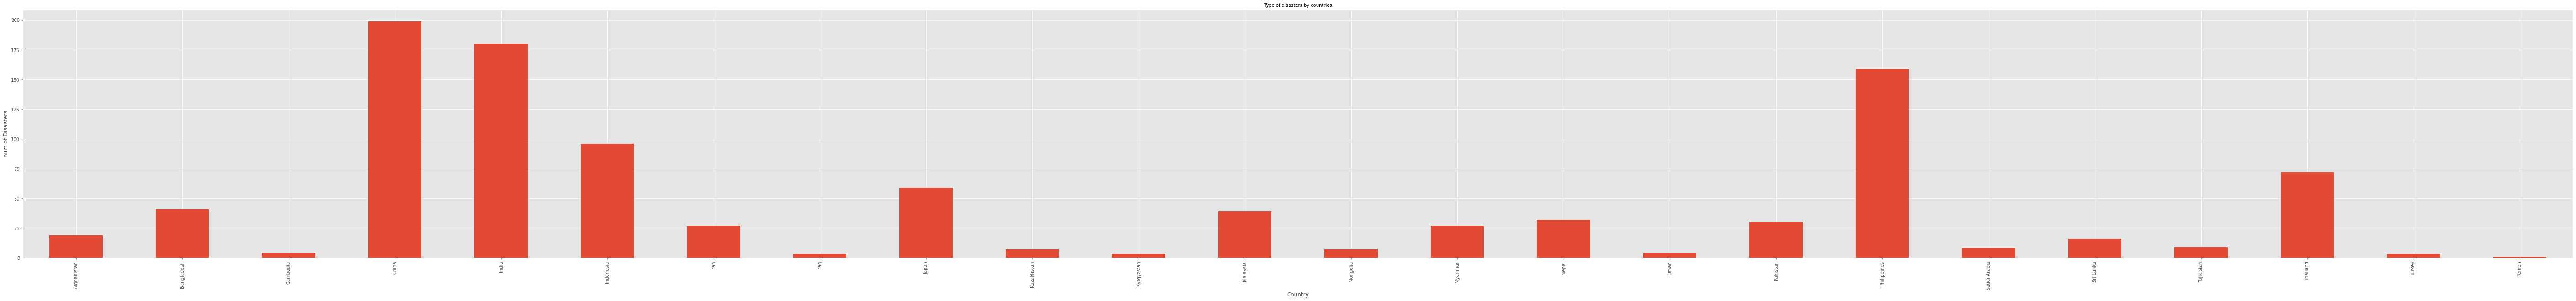

In [319]:
crt_country_by_year.plot(kind="bar",figsize=(100,10))
plt.title("Type of disasters by countries",fontsize=10)
plt.ylabel("num of Disasters")
plt.xlabel("Country")
plt.show()

The countries with the most disasters are: China , India , Philippines , Indonesia , Thailand

<AxesSubplot:xlabel='Country'>

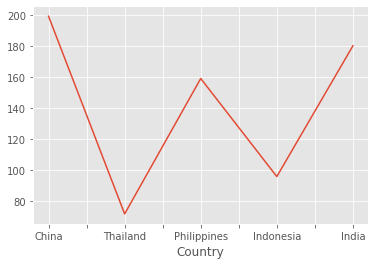

In [263]:
graph = crt_country_by_year.groupby("Country").mean()[["China","Thailand","Philippines","Indonesia","India"]]
graph.plot()

In [322]:
india = dataset[dataset["Country"]=="India"]
china = dataset[dataset["Country"]=="China"]
philippines = dataset[dataset["Country"] == "Philippines"]
indonesia = dataset[dataset["Country"] == "Indonesia"]
thailand = dataset[dataset["Country"] == "Thailand"]

#now we check for each from the top 5 countries how many floods were per year (the countries that ther sum_normalize > 1)
top_in_asia = pd.concat([india, china,philippines,indonesia , thailand], ignore_index = True, axis = 0)
#a dataframe of top 5
print(top_in_asia)
print("======")

#now we get the crosstab per country
crt_india =  pd.crosstab(india["Country"],india["Year"])
crt_china = pd.crosstab(china["Country"],china["Year"])
crt_philippines = pd.crosstab(philippines["Country"],philippines["Year"])
crt_indonesia = pd.crosstab(indonesia["Country"],indonesia["Year"])
crt_thailand = pd.crosstab(thailand["Country"],thailand["Year"])
print(crt_india)
print("======")
print(crt_china)
print("======")
print(crt_philippines)
print("======")
print(crt_indonesia)
print("======")
print(crt_thailand)

    Month temperature  Year   Country         City dew_point humidity  \
0       8          69  2014     India    Balrampur        52       87   
1       3          82  2014     India         Boko        79       89   
2       7          82  2015     India       Rajkot        79       89   
3       7          82  2016     India      Chamoli        79       89   
4       8          78  2016     India      Bhojpur        75       80   
..    ...         ...   ...       ...          ...       ...      ...   
701    12          80  2017  Thailand     Phangnga        75       94   
702    12          79  2017  Thailand   Chaiyaphum        75       89   
703     1          73  2017  Thailand  Uthai Thani        70       88   
704    12          82  2017  Thailand      Kalasin        76       83   
705     1          81  2017  Thailand      Lampang        77       94   

    wind_spd wind_gust pressure precip      condition  disaster_type  
0          9         0    29.38    0.0           Fai

In [324]:
top_in_asia

,Month,temperature,Year,Country,City,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,8,69,2014,India,Balrampur,52,87,9,0,29.38,0.0,Fair,1
1,3,82,2014,India,Boko,79,89,0,0,29.61,0.0,Haze,1
2,7,82,2015,India,Rajkot,79,89,0,0,29.61,0.0,Haze,1
3,7,82,2016,India,Chamoli,79,89,0,0,29.28,0.0,Haze,1
4,8,78,2016,India,Bhojpur,75,80,14,0,29.61,0.0,Mostly Cloudy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,12,80,2017,Thailand,Phangnga,75,94,0,0,29.44,0.0,N/A,0
702,12,79,2017,Thailand,Chaiyaphum,75,89,18,0,29.48,0.0,Mostly Cloudy,0
703,1,73,2017,Thailand,Uthai Thani,70,88,0,0,29.08,0.0,Cloudy,0
704,12,82,2017,Thailand,Kalasin,76,83,11,0,29.64,0.0,N/A,0


In [323]:
crt_top_in_asia =  pd.crosstab(top_in_asia["Year"],top_in_asia["Country"])
crt_top_in_asia

Country,China,India,Indonesia,Philippines,Thailand
Year,,,,,
2014,44,18,16,66,12
2015,18,46,7,9,1
2016,56,42,28,30,11
2017,65,44,30,30,48
2018,16,30,15,24,0


india


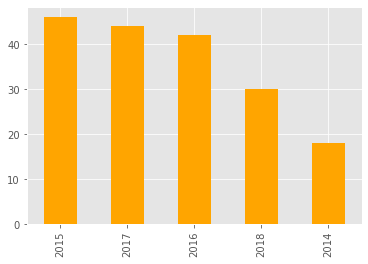

china


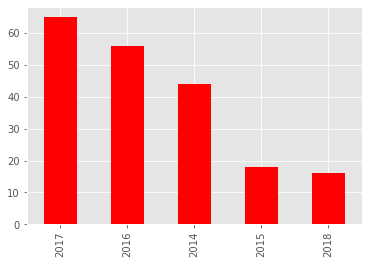

philippines


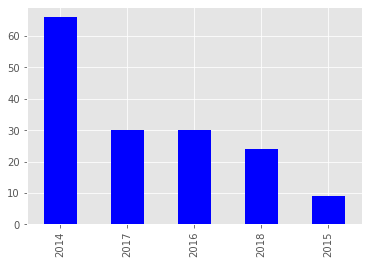

indonesia


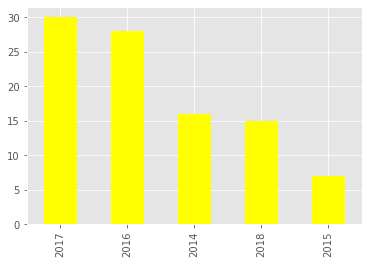

thailand


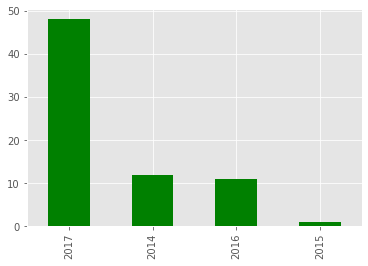

In [326]:
print("india")
india["Year"].value_counts().plot(kind= "bar" , color = "orange")
plt.show()
print("china")
china["Year"].value_counts().plot(kind="bar",color="red")
plt.show()
print("philippines")
philippines["Year"].value_counts().plot(kind="bar",color="blue")
plt.show()
print("indonesia")
indonesia["Year"].value_counts().plot(kind="bar",color="yellow")
plt.show()
print("thailand")
thailand["Year"].value_counts().plot(kind="bar",color="green")
plt.show()


In [328]:
dffloods = dataset[dataset["disaster_type"] == 1]
india_flood = dffloods[dffloods["Country"]=="India"]
china_flood = dffloods[dffloods["Country"]=="China"]
philippines_flood = dffloods[dffloods["Country"] == "Philippines"]
indonesia_flood = dffloods[dffloods["Country"] == "Indonesia"]
thailand_flood = dffloods[dffloods["Country"] == "Thailand"]

#now we check for each from the top 5 countries how many floods were per year (the countries that ther sum_normalize > 1)
top_in_asia_flood = pd.concat([india_flood, china_flood,philippines_flood,indonesia_flood , thailand_flood], ignore_index = True, axis = 0)
#a dataframe of top 5
print(top_in_asia_flood)
print("======")

#now we get the crosstab per country
crt_india_flood =  pd.crosstab(india_flood["Country"],india_flood["Year"])
crt_china_flood = pd.crosstab(china_flood["Country"],china_flood["Year"])
crt_philippines_flood = pd.crosstab(philippines_flood["Country"],philippines_flood["Year"])
crt_indonesia_flood = pd.crosstab(indonesia_flood["Country"],indonesia_flood["Year"])
crt_thailand_flood = pd.crosstab(thailand_flood["Country"],thailand_flood["Year"])

    Month temperature  Year   Country           City dew_point humidity  \
0       8          69  2014     India      Balrampur        52       87   
1       3          82  2014     India           Boko        79       89   
2       7          82  2015     India         Rajkot        79       89   
3       7          82  2016     India        Chamoli        79       89   
4       8          78  2016     India        Bhojpur        75       80   
..    ...         ...   ...       ...            ...       ...      ...   
373    11          79  2017  Thailand       Chumphon        77       94   
374     8          75  2017  Thailand  Nakhon Phanom        75      100   
375    11          79  2017  Thailand       Lop Buri        77       89   
376     5          75  2017  Thailand        Lampang        75      100   
377     5          75  2017  Thailand     Chiang Mai        75      100   

    wind_spd wind_gust pressure precip      condition  disaster_type  
0          9         0    29

india


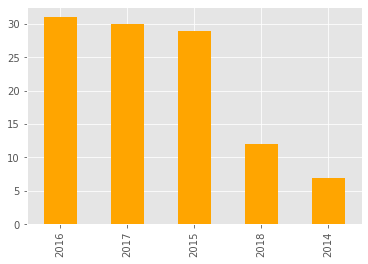

china


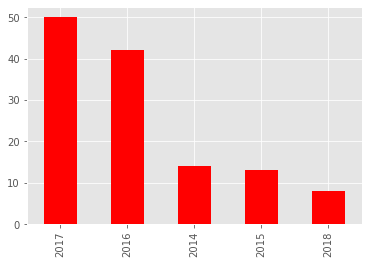

philippines


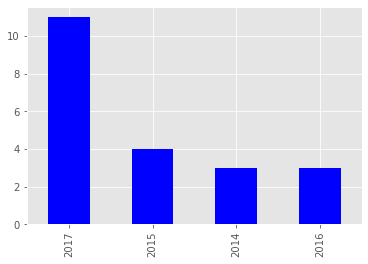

indonesia


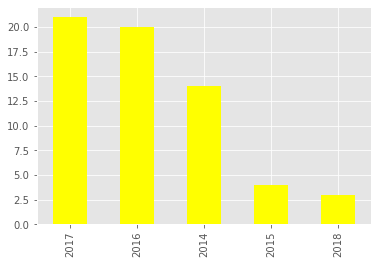

thailand


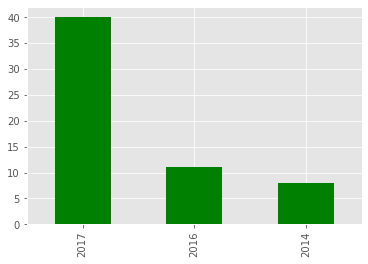

In [329]:
print("india")
india_flood["Year"].value_counts().plot(kind= "bar" , color = "orange")
plt.show()
print("china")
china_flood["Year"].value_counts().plot(kind="bar",color="red")
plt.show()
print("philippines")
philippines_flood["Year"].value_counts().plot(kind="bar",color="blue")
plt.show()
print("indonesia")
indonesia_flood["Year"].value_counts().plot(kind="bar",color="yellow")
plt.show()
print("thailand")
thailand_flood["Year"].value_counts().plot(kind="bar",color="green")
plt.show()


We can see that despite the alarming data on India regarding disasters, China is in a very alarming state regarding floods due to drastic decline from year to year

C:\Users\Gil\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


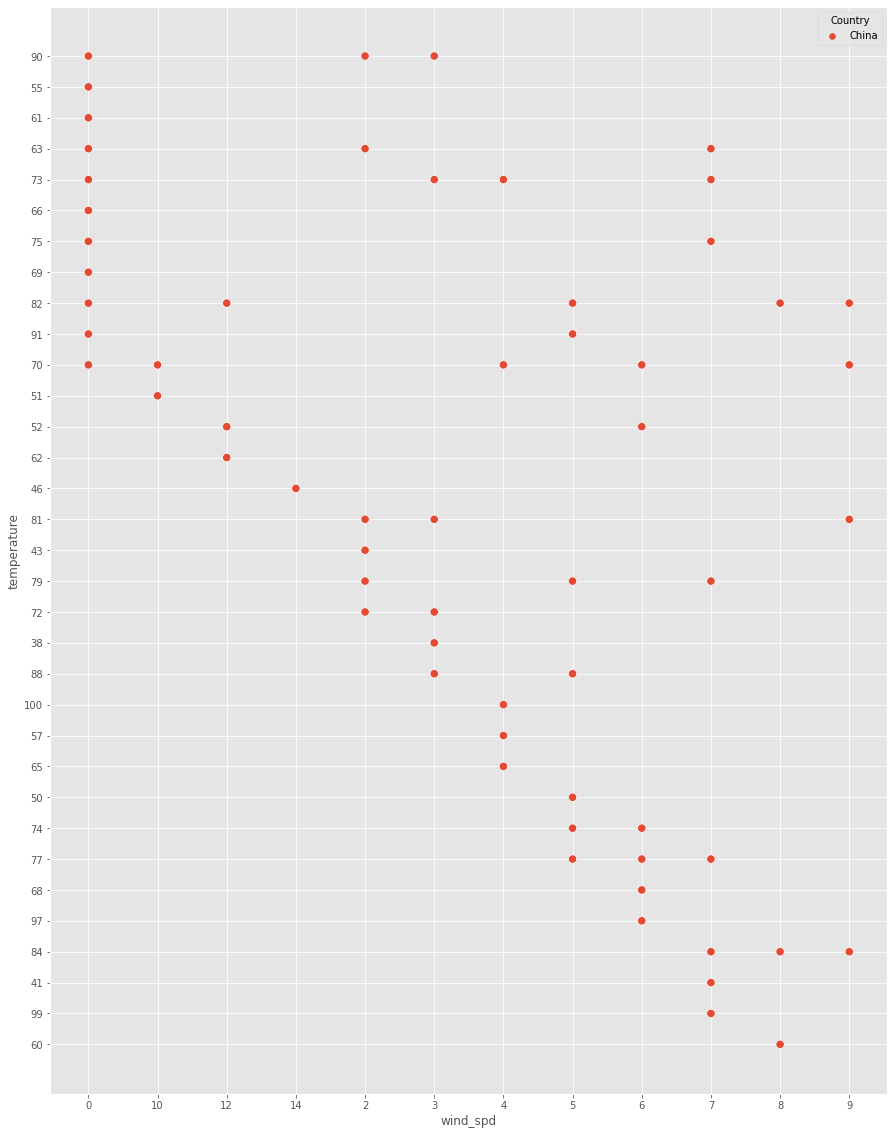

In [346]:
china_flood.sort_values("wind_spd",inplace= True)

fig = plt.figure(figsize=(15,20))
sns.scatterplot(x="wind_spd" , y="temperature",s=70,hue= "Country",data=china_flood)
plt.show()

C:\Users\Gil\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


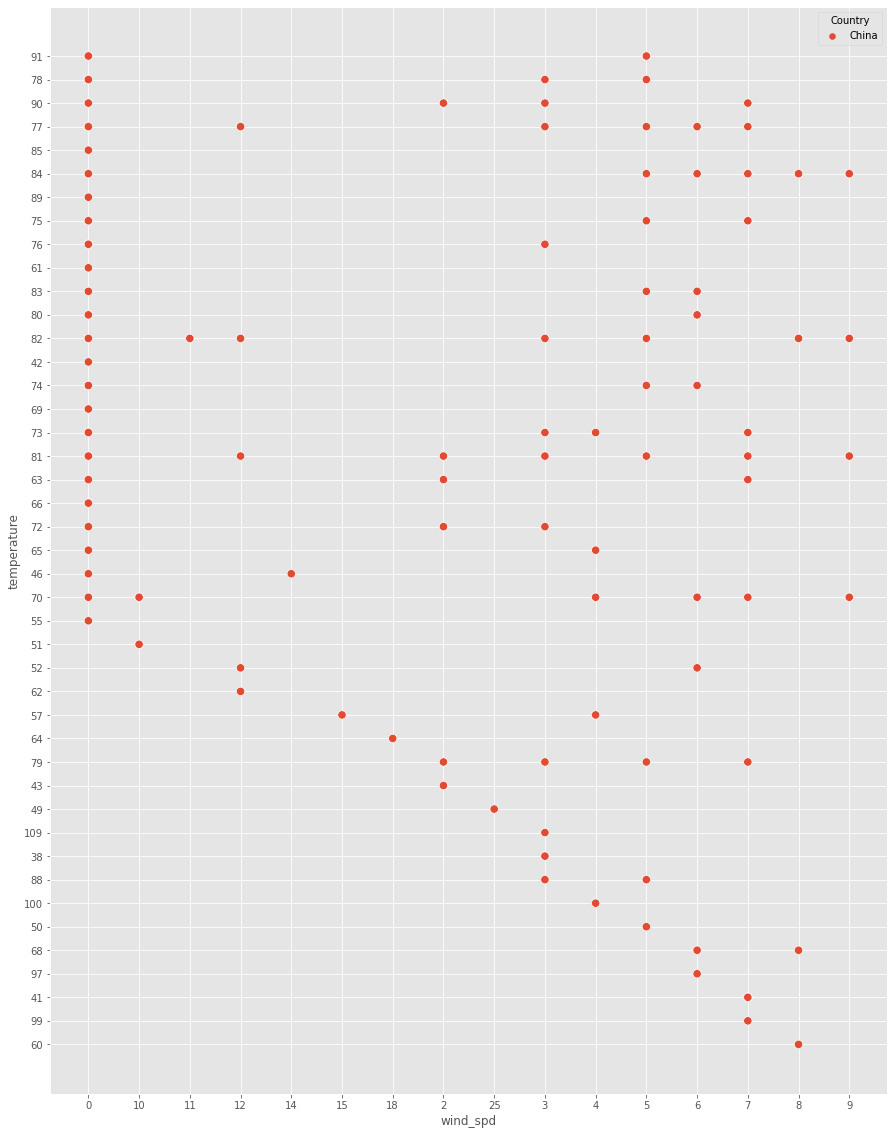

In [347]:
china.sort_values("wind_spd",inplace= True)

fig = plt.figure(figsize=(15,20))
sns.scatterplot(x="wind_spd" , y="temperature",s=70,hue= "Country",data=china)
plt.show()

In China, the probabuility for disaster is big if the wind speed is low

and now, for all top asia:

In [471]:
data_top_asia = pd.concat([top_in_asia,top_in_asia_flood], ignore_index = True, axis = 0)


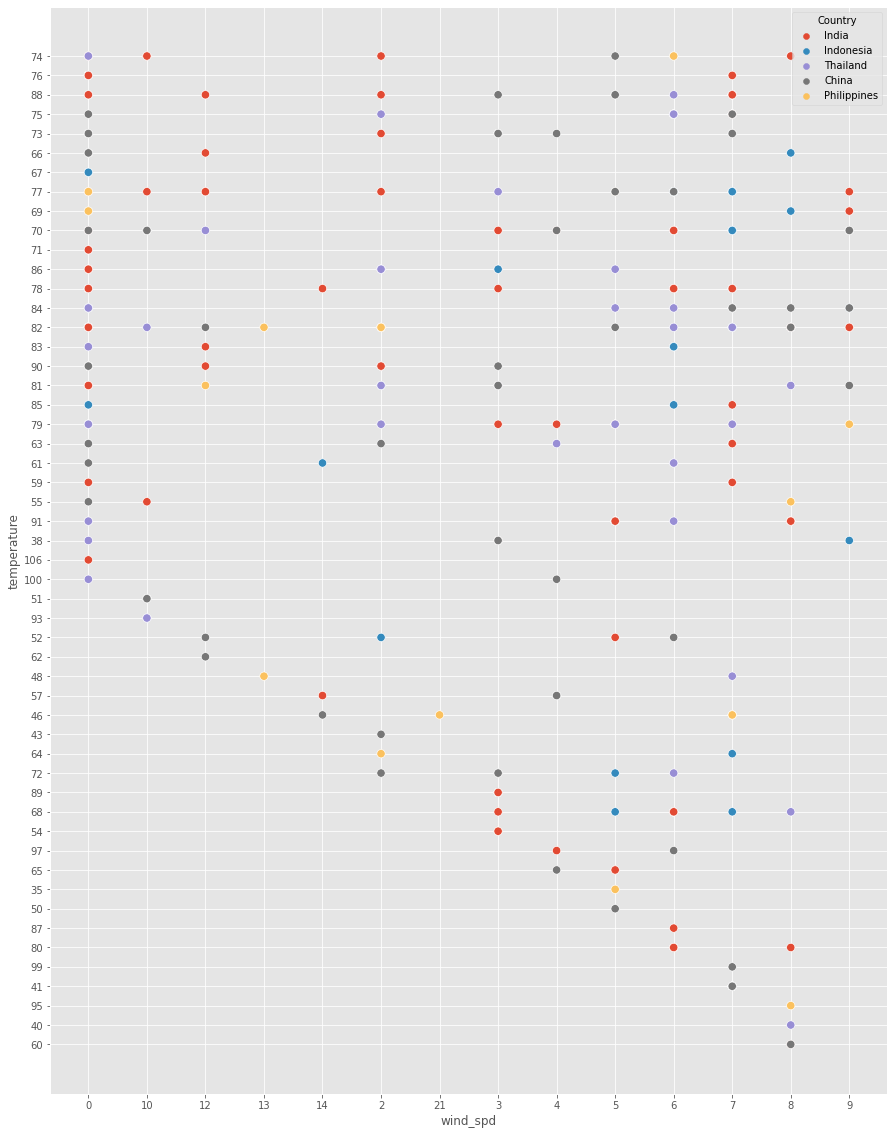

In [351]:
top_in_asia_flood.sort_values("wind_spd",inplace= True)

fig = plt.figure(figsize=(15,20))
sns.scatterplot(x="wind_spd" , y="temperature",s=70,hue= "Country",data=top_in_asia_flood)
plt.show()

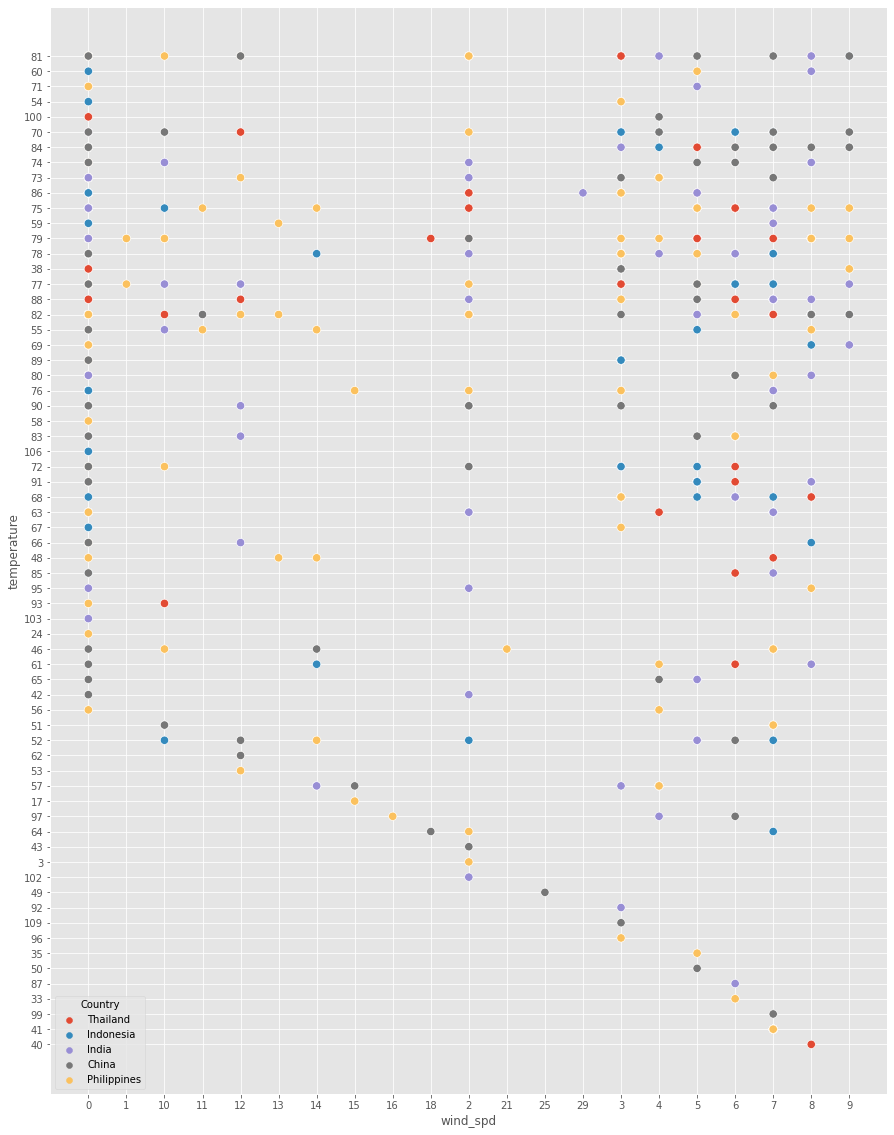

In [707]:
top_in_asia.sort_values("wind_spd",inplace= True)

fig = plt.figure(figsize=(15,20))
sns.scatterplot(x="wind_spd" , y="temperature",s=70,hue= "Country",data=top_in_asia)
plt.show()

Like China, the top 5 countries of Asia.
the probabuility for disaster is big if the wind speed is low
and also for flood.

In [708]:
data_top_asia

,Month,temperature,Year,Country,City,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
0,1,81,2017,Thailand,Lampang,77,94,0,0,28.81,0.0,Haze,0
1,11,73,2014,China,Guizhou,57,94,0,0,29.65,0.0,Fair,1
2,11,66,2014,China,Jiangxi,52,60,0,0,28.15,0.0,Fair,1
3,7,63,2018,Philippines,Cebu,59,88,0,0,29.04,0.0,Fog,0
4,6,63,2015,China,Guizhou,59,88,0,0,29.04,0.0,Fog,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,5,82,2018,India,Darrang,77,93,9,0,29.37,0.0,Mostly Cloudy,1
1080,1,70,2017,China,Sichuan,66,94,9,0,28.35,0.0,Partly Cloudy,1
1081,8,69,2014,India,Balrampur,52,87,9,0,29.38,0.0,Fair,1
1082,6,84,2016,China,Guizhou Sheng,77,74,9,0,29.71,0.0,Mostly Cloudy,1


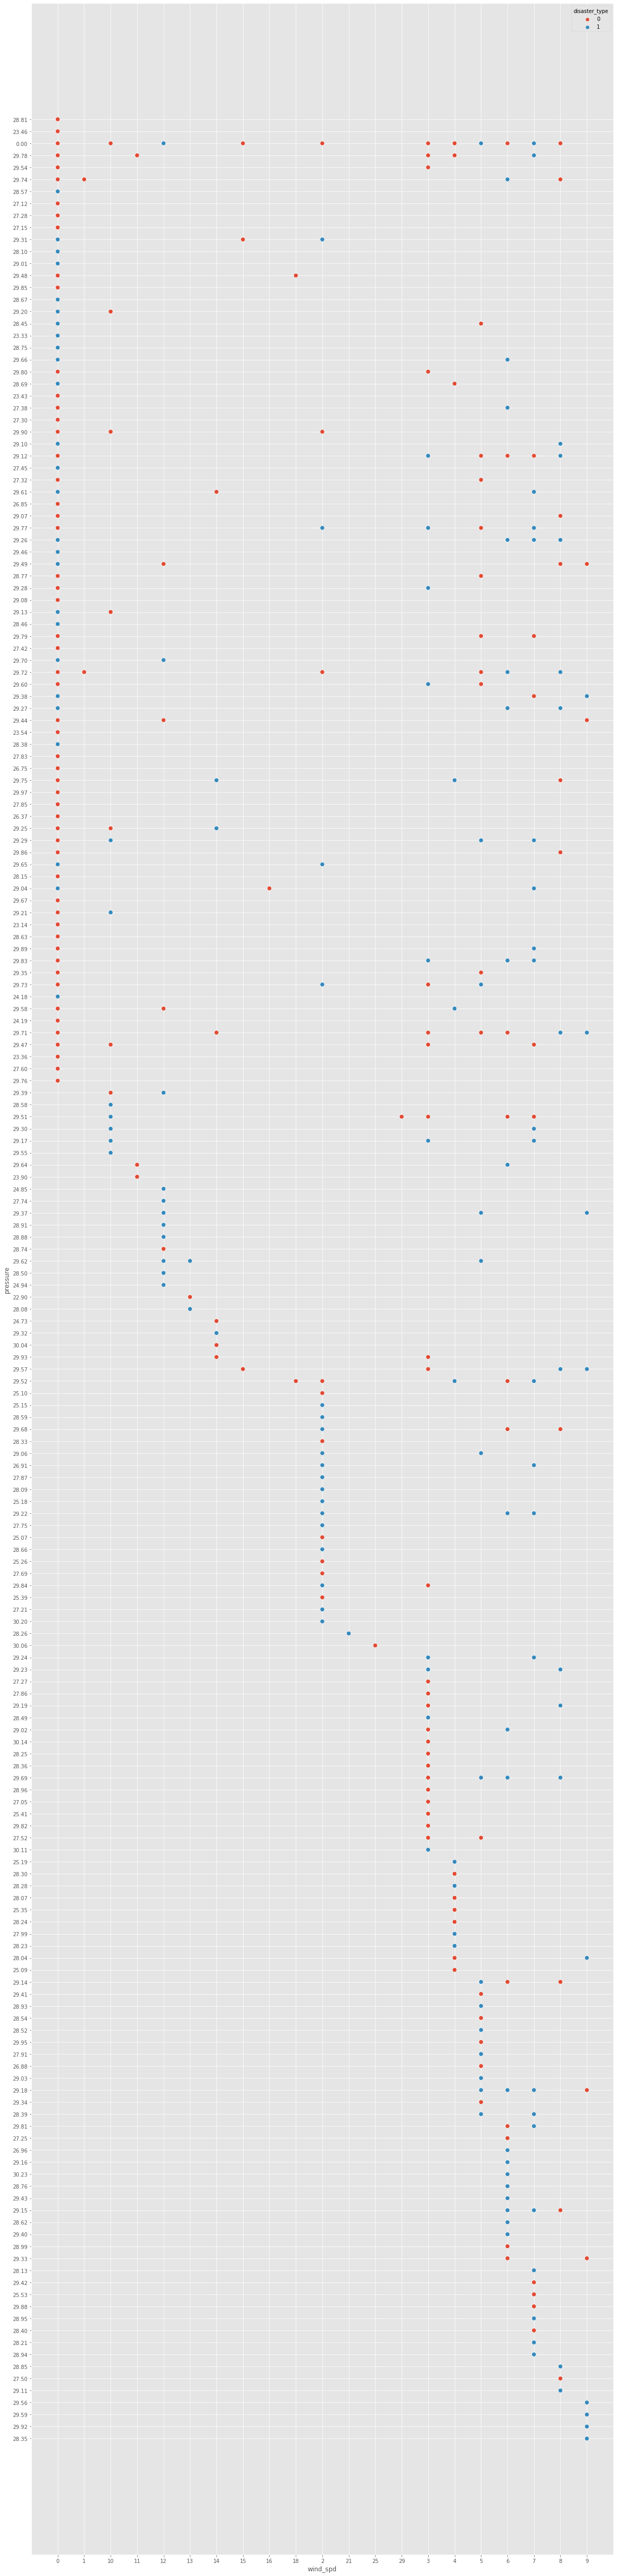

In [720]:
data_top_asia.sort_values("pressure",inplace= True)
fig = plt.figure(figsize=(20,90))
sns.scatterplot(x="wind_spd" , y="pressure",s=70,hue="disaster_type" ,data=top_in_asia)
plt.show()

In [740]:
top_asia_2017 = data_top_asia[data_top_asia["Year"]==2017]
top_asia_2017

,Month,temperature,Year,Country,City,dew_point,humidity,wind_spd,wind_gust,pressure,precip,condition,disaster_type
985,6,85,2017,India,Sonitpur,78,87,7,0,0.00,0.0,Mostly Cloudy,1
326,8,82,2017,India,Shravasti,80,92,2,0,0.00,0.0,Mostly Cloudy,1
145,6,71,2017,India,Golaghat,55,65,0,0,0.00,0.0,Fair,1
934,8,87,2017,India,Balarampur,83,98,6,0,0.00,0.0,Mostly Cloudy,1
408,8,86,2017,India,Maharajganj,71,60,3,0,0.00,0.0,Fair,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,11,82,2017,Thailand,Pattani,77,100,2,0,29.84,0.0,Partly Cloudy,1
285,12,55,2017,Philippines,Eastern Samar,52,88,14,0,29.93,0.0,Fair,0
367,2,54,2017,Philippines,Agusan del Sur,50,82,3,0,30.11,0.0,Fair,1
877,2,54,2017,Philippines,Agusan del Sur,50,82,3,0,30.11,0.0,Fair,1


In [722]:
crt_pressure_by_disasters =  pd.crosstab(data_top_asia["pressure"],data_top_asia["disaster_type"])
crt_pressure_by_disasters

disaster_type,0,1
pressure,,
0.00,60,60
22.90,1,0
23.14,1,0
23.33,0,2
23.36,1,0
...,...,...
30.06,1,0
30.11,0,2
30.14,1,2


In [743]:
crt_temperature_by_condition =  pd.crosstab(top_asia_2017["temperature"],top_asia_2017["condition"])
crt_temperature_by_condition

condition,Cloudy,Fair,Fog,Haze,Light Rain,Light Rain Shower,Mostly Cloudy,N/A,Partly Cloudy,Rain,Smoke,Widespread Dust
temperature,,,,,,,,,,,,
100,0,2,0,0,0,0,0,0,2,0,0,0
24,0,1,0,0,0,0,0,0,0,0,0,0
35,2,0,0,0,0,0,0,0,0,0,0,0
38,0,8,0,0,0,0,0,0,0,0,0,0
40,2,0,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,1,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,2,0,0
51,4,0,0,0,0,0,0,0,0,0,0,0
52,1,2,0,0,0,0,0,0,0,0,0,0


<Figure size 6480x6480 with 0 Axes>

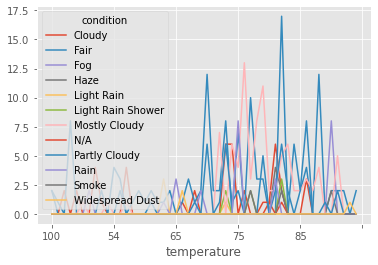

In [748]:
graph = crt_temperature_by_condition.groupby("temperature").mean()[list(crt_temperature_by_condition.columns)]
fig = plt.figure(figsize=(90,90))
graph.plot()
plt.show()

 # Machine Learnning


For start,we will try to predict if there will be flood or not

In [750]:
X = data_top_asia.drop(columns=['disaster_type'],axis='columns')

y=data_top_asia['disaster_type']

X = pd.get_dummies(X,columns=['Country','City','condition'], drop_first=True)


In [751]:
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [752]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

model=DecisionTreeClassifier(criterion='entropy')

In [753]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [754]:
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 87.73


second Machine Learnning for the country of the flood


In [724]:
X = data_top_asia.drop(columns=['Country',"Month","City","wind_gust","precip"],axis='columns')

y=data_top_asia['Country']

In [725]:
X["temperature"] = LabelEncoder().fit_transform(X["temperature"])
X["dew_point"] = LabelEncoder().fit_transform(X["dew_point"])
X["humidity"] = LabelEncoder().fit_transform(X["humidity"])
X["wind_spd"] = LabelEncoder().fit_transform(X["wind_spd"])
X["pressure"] = LabelEncoder().fit_transform(X["pressure"])
X["condition"] = LabelEncoder().fit_transform(X["condition"])


In [726]:
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [727]:
clf=DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [728]:
y_pred=clf.predict(X_test)

In [729]:
text_representation = tree.export_text(clf)
text_representation

'|--- feature_7 <= 0.50\n|   |--- feature_5 <= 80.00\n|   |   |--- feature_3 <= 5.50\n|   |   |   |--- class: China\n|   |   |--- feature_3 >  5.50\n|   |   |   |--- class: India\n|   |--- feature_5 >  80.00\n|   |   |--- feature_2 <= 48.50\n|   |   |   |--- class: Philippines\n|   |   |--- feature_2 >  48.50\n|   |   |   |--- class: Philippines\n|--- feature_7 >  0.50\n|   |--- feature_5 <= 56.00\n|   |   |--- feature_0 <= 37.50\n|   |   |   |--- class: China\n|   |   |--- feature_0 >  37.50\n|   |   |   |--- class: India\n|   |--- feature_5 >  56.00\n|   |   |--- feature_5 <= 165.50\n|   |   |   |--- class: China\n|   |   |--- feature_5 >  165.50\n|   |   |   |--- class: Thailand\n'

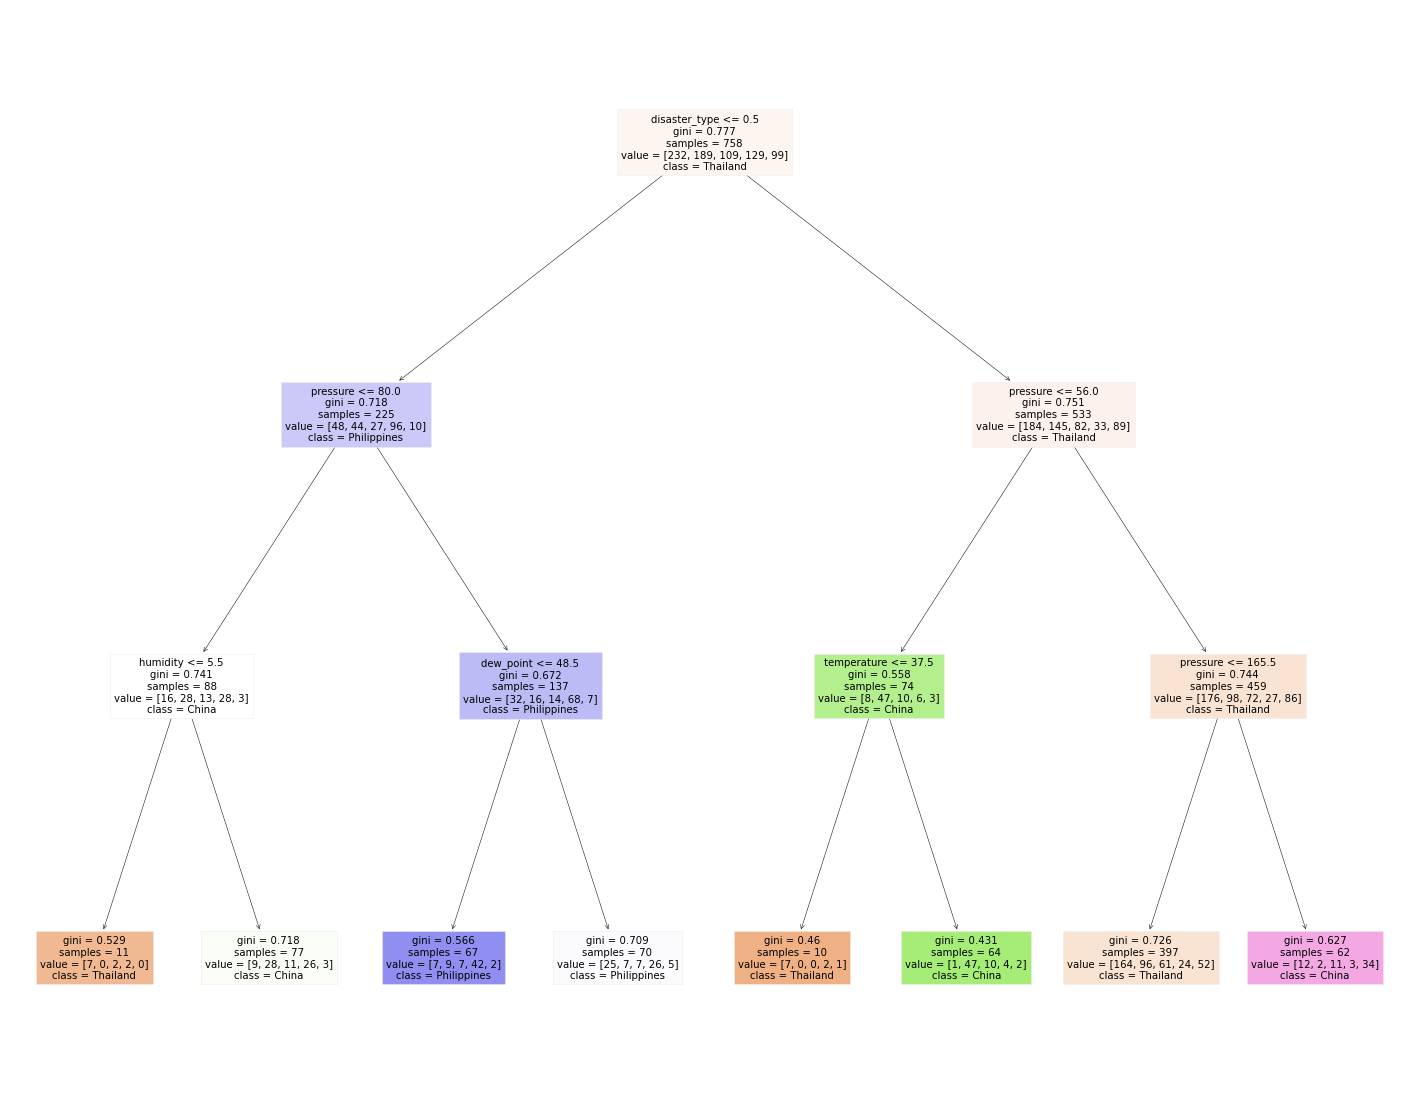

In [730]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns ,
                   class_names=y,
                   filled=True)

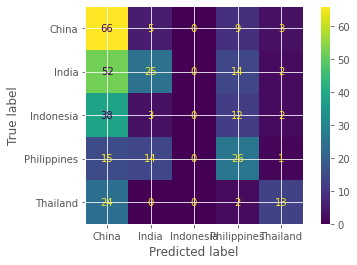

In [704]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [705]:
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 39.88




Finally, we will prepare a Machine Learning
for testing whether a change in the weather affects the chance of a flood


In [755]:
X = data_top_asia.drop(columns=['condition'],axis='columns')

y=data_top_asia['condition']



In [756]:
X["temperature"] = LabelEncoder().fit_transform(X["temperature"])
X["dew_point"] = LabelEncoder().fit_transform(X["dew_point"])
X["humidity"] = LabelEncoder().fit_transform(X["humidity"])
X["wind_spd"] = LabelEncoder().fit_transform(X["wind_spd"])
X["pressure"] = LabelEncoder().fit_transform(X["pressure"])
X["Country"] = LabelEncoder().fit_transform(X["Country"])
X["City"] = LabelEncoder().fit_transform(X["City"])


In [757]:
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [758]:
clf=DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [759]:
y_pred=clf.predict(X_test)

In [760]:
text_representation = tree.export_text(clf)
text_representation

'|--- feature_5 <= 36.50\n|   |--- feature_6 <= 40.00\n|   |   |--- feature_6 <= 0.50\n|   |   |   |--- class: Fog\n|   |   |--- feature_6 >  0.50\n|   |   |   |--- class: Fair\n|   |--- feature_6 >  40.00\n|   |   |--- feature_9 <= 61.50\n|   |   |   |--- class: Fair\n|   |   |--- feature_9 >  61.50\n|   |   |   |--- class: Fair\n|--- feature_5 >  36.50\n|   |--- feature_5 <= 53.50\n|   |   |--- feature_1 <= 39.00\n|   |   |   |--- class: Fair\n|   |   |--- feature_1 >  39.00\n|   |   |   |--- class: Mostly Cloudy\n|   |--- feature_5 >  53.50\n|   |   |--- feature_5 <= 56.50\n|   |   |   |--- class: Mostly Cloudy\n|   |   |--- feature_5 >  56.50\n|   |   |   |--- class: Fog\n'

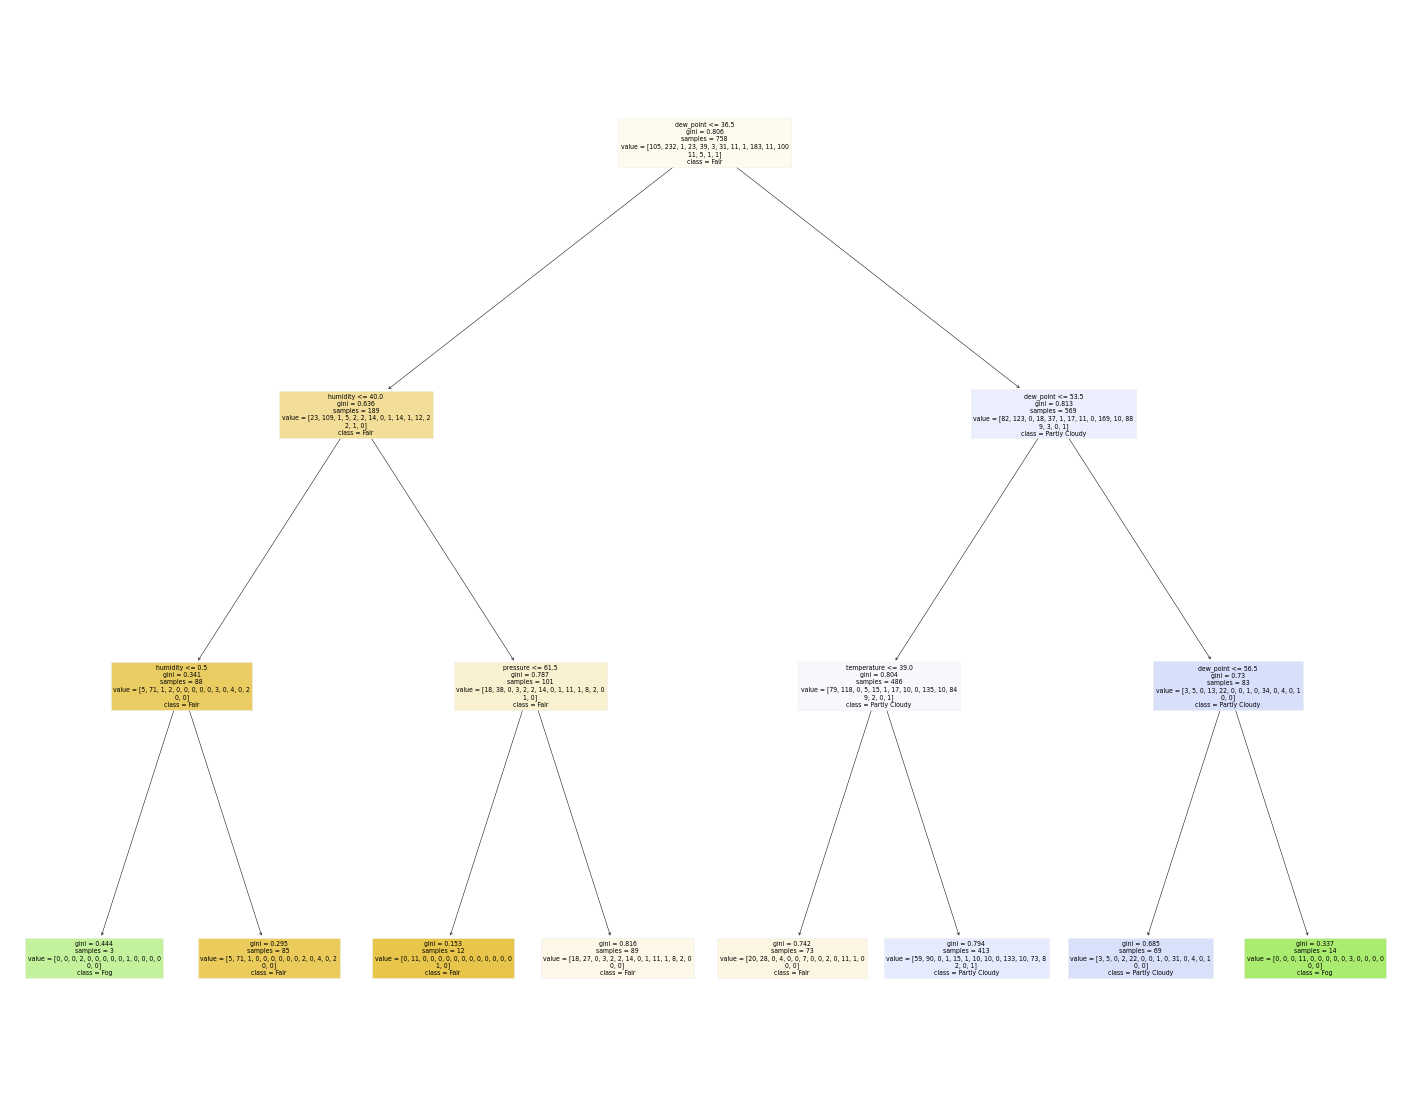

In [761]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns ,
                   class_names=y,
                   filled=True)